# Prediction of music genre


## Data Description

**Music Genre Classfication (MGC) Dataset**

**Number of Instances:** 50,000 \
**Number of Attributes:** 17 **Input Features** + 1 **Target**('Music Genre')

### Attribute Information:
1. instance_id: A unique identifier for each instance in the dataset, represented as a floating-point number. There are 50,000 instances in total.
2. artist_name: The name of the artist who created the track, represented as a string (object).
3. track_name: The name of the track, represented as a string (object).
4. popularity: A measure of the popularity of the track, represented as a floating-point number between 0 and 100. Higher values indicate greater popularity.
5. acousticness: A measure of the acousticness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater acousticness.
6. danceability: A measure of the danceability of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater danceability.
7. duration_ms: The duration of the track in milliseconds, represented as a floating-point number.
8. energy: A measure of the energy of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater energy.
9. instrumentalness: A measure of the instrumentalness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater instrumentalness.
10. key: The key in which the track is performed, represented as a string (object). There are 12 possible values: 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', and 'B'.
11. liveness: A measure of the liveness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater liveness.
12. loudness: A measure of the loudness of the track, represented as a floating-point number in decibels (dB). Higher values indicate greater loudness.
13. mode: The mode in which the track is performed, represented as a string (object). There are two possible values: 'major' and 'minor'.
14. speechiness: A measure of the speechiness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater speechiness.
15. tempo: The tempo of the track in beats per minute (BPM), represented as a string (object).
16. obtained_date: The date on which the track information was obtained, represented as a string (object).
17. valence: A measure of the valence (positivity) of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater positivity.

18. **music_genre: The genre of the track, represented as a string (object). There are multiple possible genres in the dataset.**

## Importing important libraries 






In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/prediction-of-music-genre/music_genre.csv


# Exploring Datasets

In [2]:
data = pd.read_csv("/kaggle/input/prediction-of-music-genre/music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


### I. Attributes of Datasets

In [3]:
print(list(data.columns))

['instance_id', 'artist_name', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre']


### II. Target Variable or Music genres

In [4]:
print(data.music_genre.value_counts().index)

Index(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues',
       'Rock', 'Classical', 'Hip-Hop'],
      dtype='object')


In [5]:
data.music_genre.value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

### III. Distribution of dataset

<BarContainer object of 10 artists>

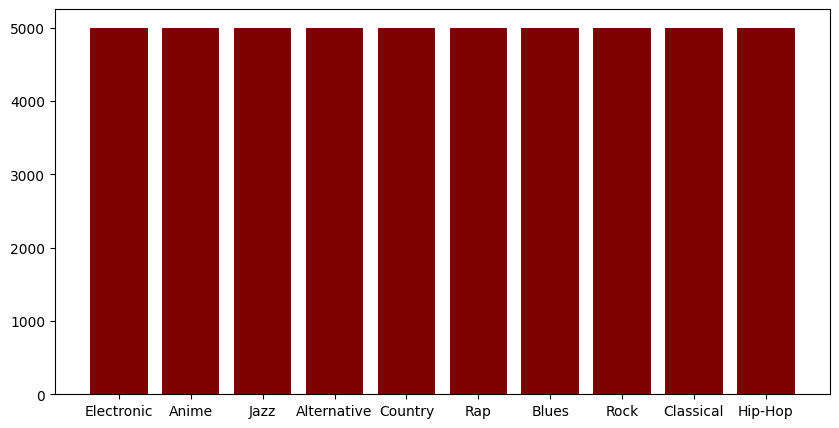

In [6]:
label = data.music_genre.value_counts().index
values =  data.music_genre.value_counts().values
list(label)
list(values)
plt.figure(figsize = (10 , 5))
plt.bar(label , values , color = "maroon")

#### Insight: Data is uniformly distributed

### IV Types of Attributes

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [8]:
print(f'Categorical Features: {len([x for x in data.columns if data[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in data.columns if data[x].dtype == float])}')

Categorical Features: 7
Numerical Features: 11


#### Insights : We can see there are 18 features. Out of 18, 7 are categorical and rest are numerical features but tempo should be numerical. So it is handled



In [9]:
print(data['tempo'].value_counts)

<bound method IndexOpsMixin.value_counts of 0                   100.889
1        115.00200000000001
2                   127.994
3                   128.014
4                   145.036
                ...        
50000     98.02799999999999
50001    122.04299999999999
50002               131.079
50003     75.88600000000001
50004     99.20100000000001
Name: tempo, Length: 50005, dtype: object>


In [10]:
#TEMPO data '?' issue
#changing tempo to float attribute and dropping '?' instances
data.drop(data[data['tempo'] == '?'].index , inplace = True)
data["tempo"] = data["tempo"].astype(float)

print(f'Categorical Features: {len([x for x in data.columns if data[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in data.columns if data[x].dtype == float])}')


Categorical Features: 6
Numerical Features: 12


In [11]:
print(data.shape)

(45025, 18)


# **Descriptive statistics of data**

In [12]:
## For Numerical columns only
data.describe(include=[np.number])

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [13]:
## For string/Object type (Categorical) columns only
data.describe(include=['O'])

,artist_name,track_name,key,mode,obtained_date,music_genre
count,45020,45020,45020,45020,45020,45020
unique,6603,38026,12,2,4,10
top,empty_field,Home,G,Major,4-Apr,Rock
freq,2229,16,5130,28874,40301,4561


# Data visualization

## 1. Plot Histograms


/tmp/ipykernel_20/4116282413.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.select_dtypes(include=np.number).hist(ax =ax)


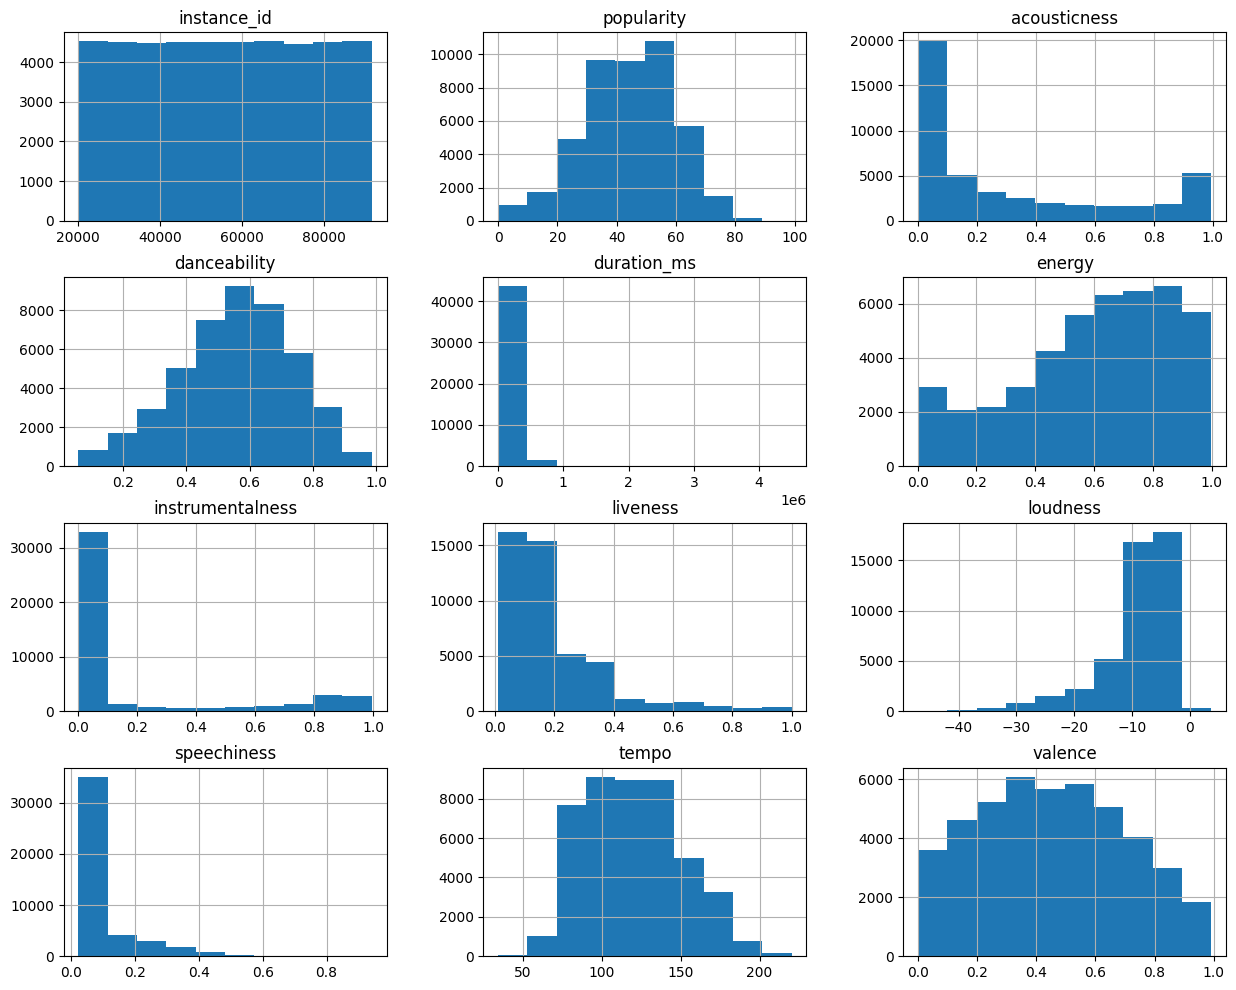

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,12))
ax = plt.axes()
data.select_dtypes(include=np.number).hist(ax =ax)
plt.show()

#### From histogram plot, we can see distribution of each features. #More to add about insights

## 2. Plot for the Features vs target

/tmp/ipykernel_20/517385864.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = data.groupby("music_genre").mean()


instance_id         float64
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object


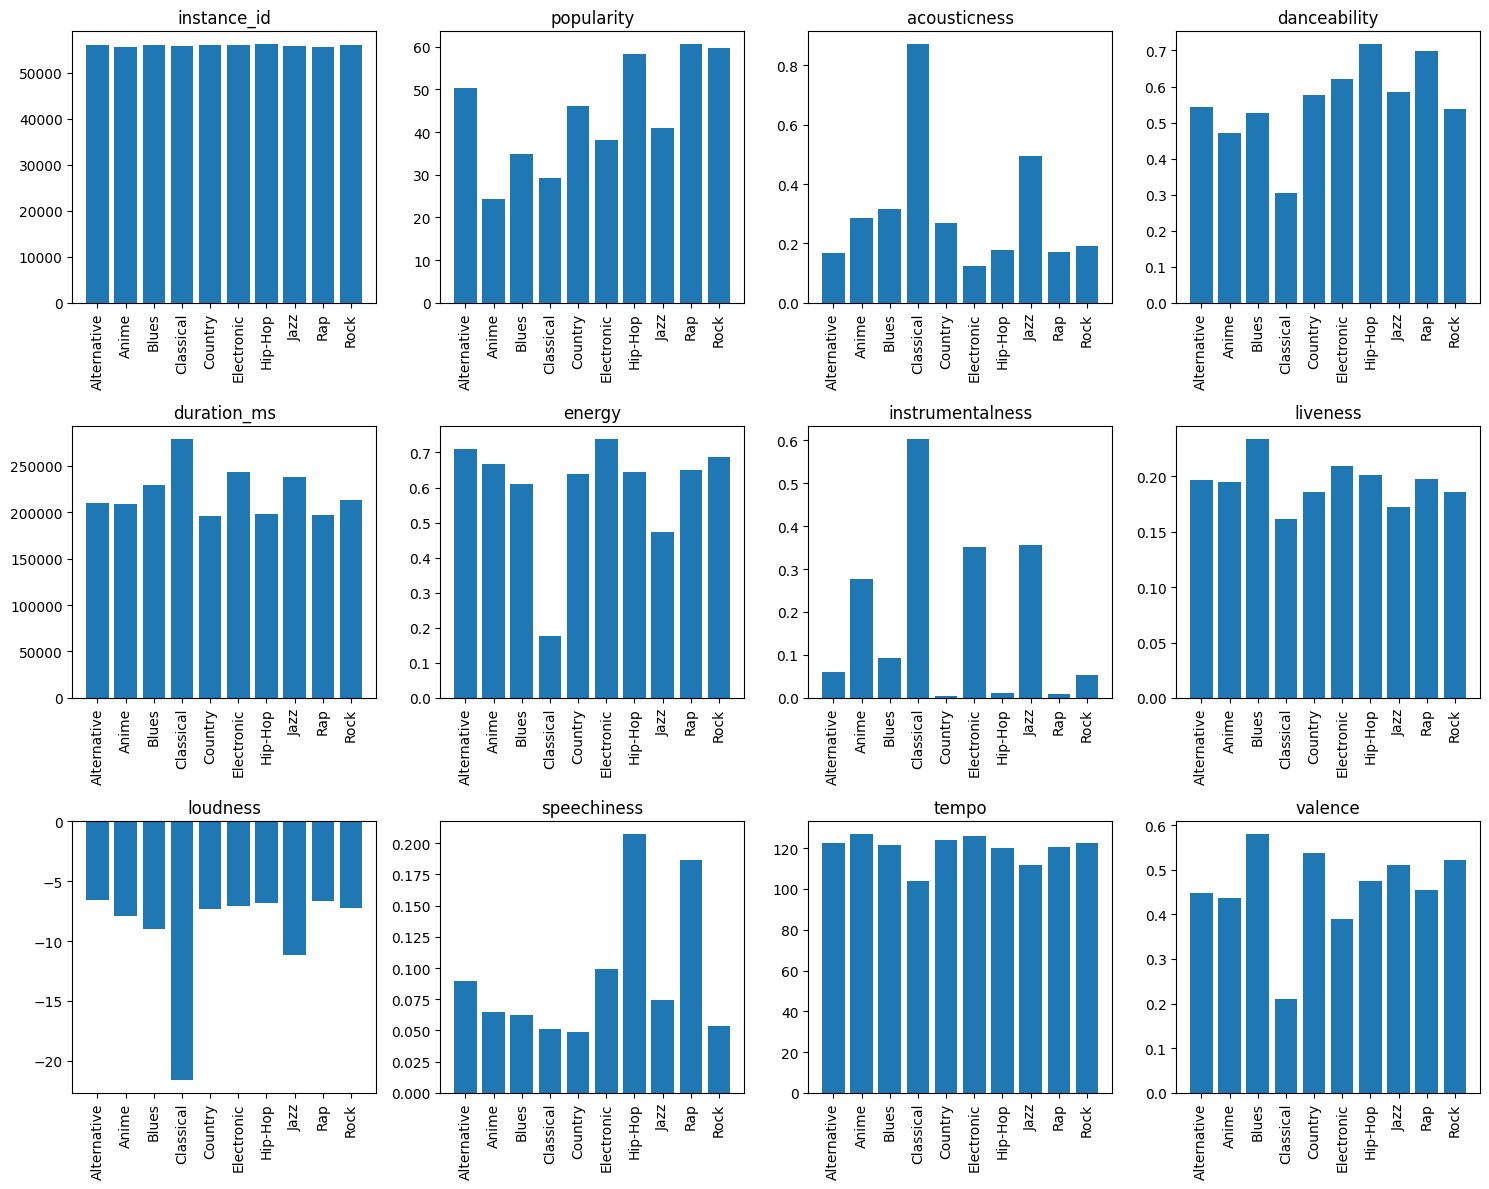

In [15]:
import matplotlib.pyplot as plt

# create the grouped dataframe
grouped = data.groupby("music_genre").mean() 
print(grouped.dtypes)


# create the subplot figure
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))

# plot each feature in a separate subplot
for i, col in enumerate(grouped.columns):
     ax = axs[i // 4][i % 4]  # select the appropriate subplot
     ax.bar(grouped.index, grouped[col])
     ax.set_title(col)
     ax.tick_params(axis='x', rotation=90)

# adjust subplot spacing and display the plot
fig.tight_layout()
plt.show() 

In [16]:
data['popularity']=data['popularity']/100
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,0.31,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,0.28,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,0.34,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,0.32,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## 3. Plot correlation matrix for numerical features


<AxesSubplot: >

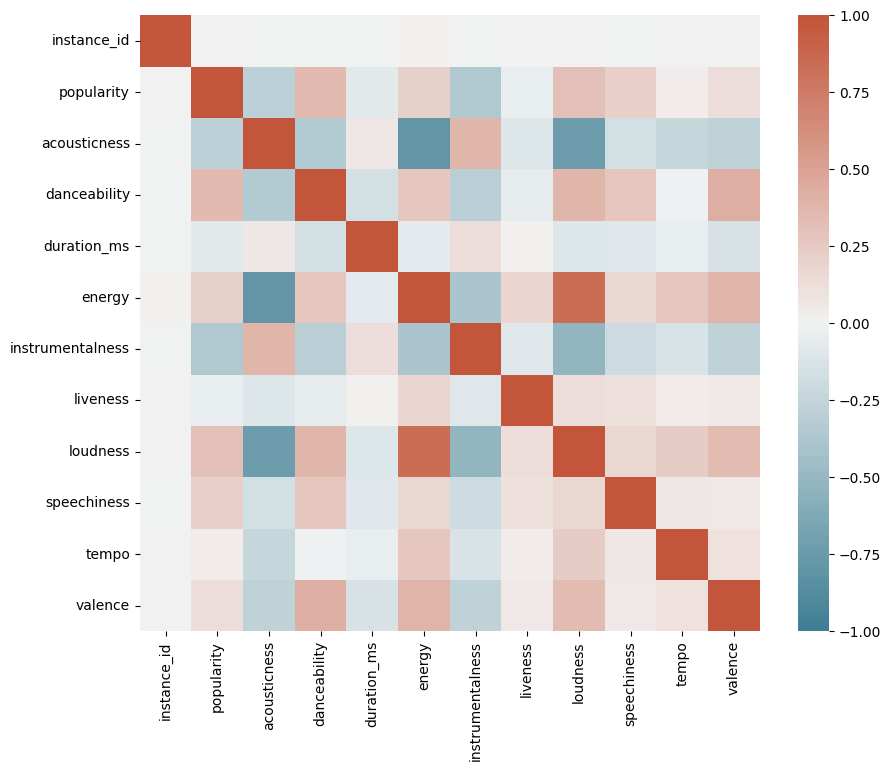

In [17]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(data.select_dtypes(include=np.number).corr(), 
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

#### Insight: Here we can see loudness and energy are highly correlated. We can remove one of them.

### 4. Box plot

<AxesSubplot: >

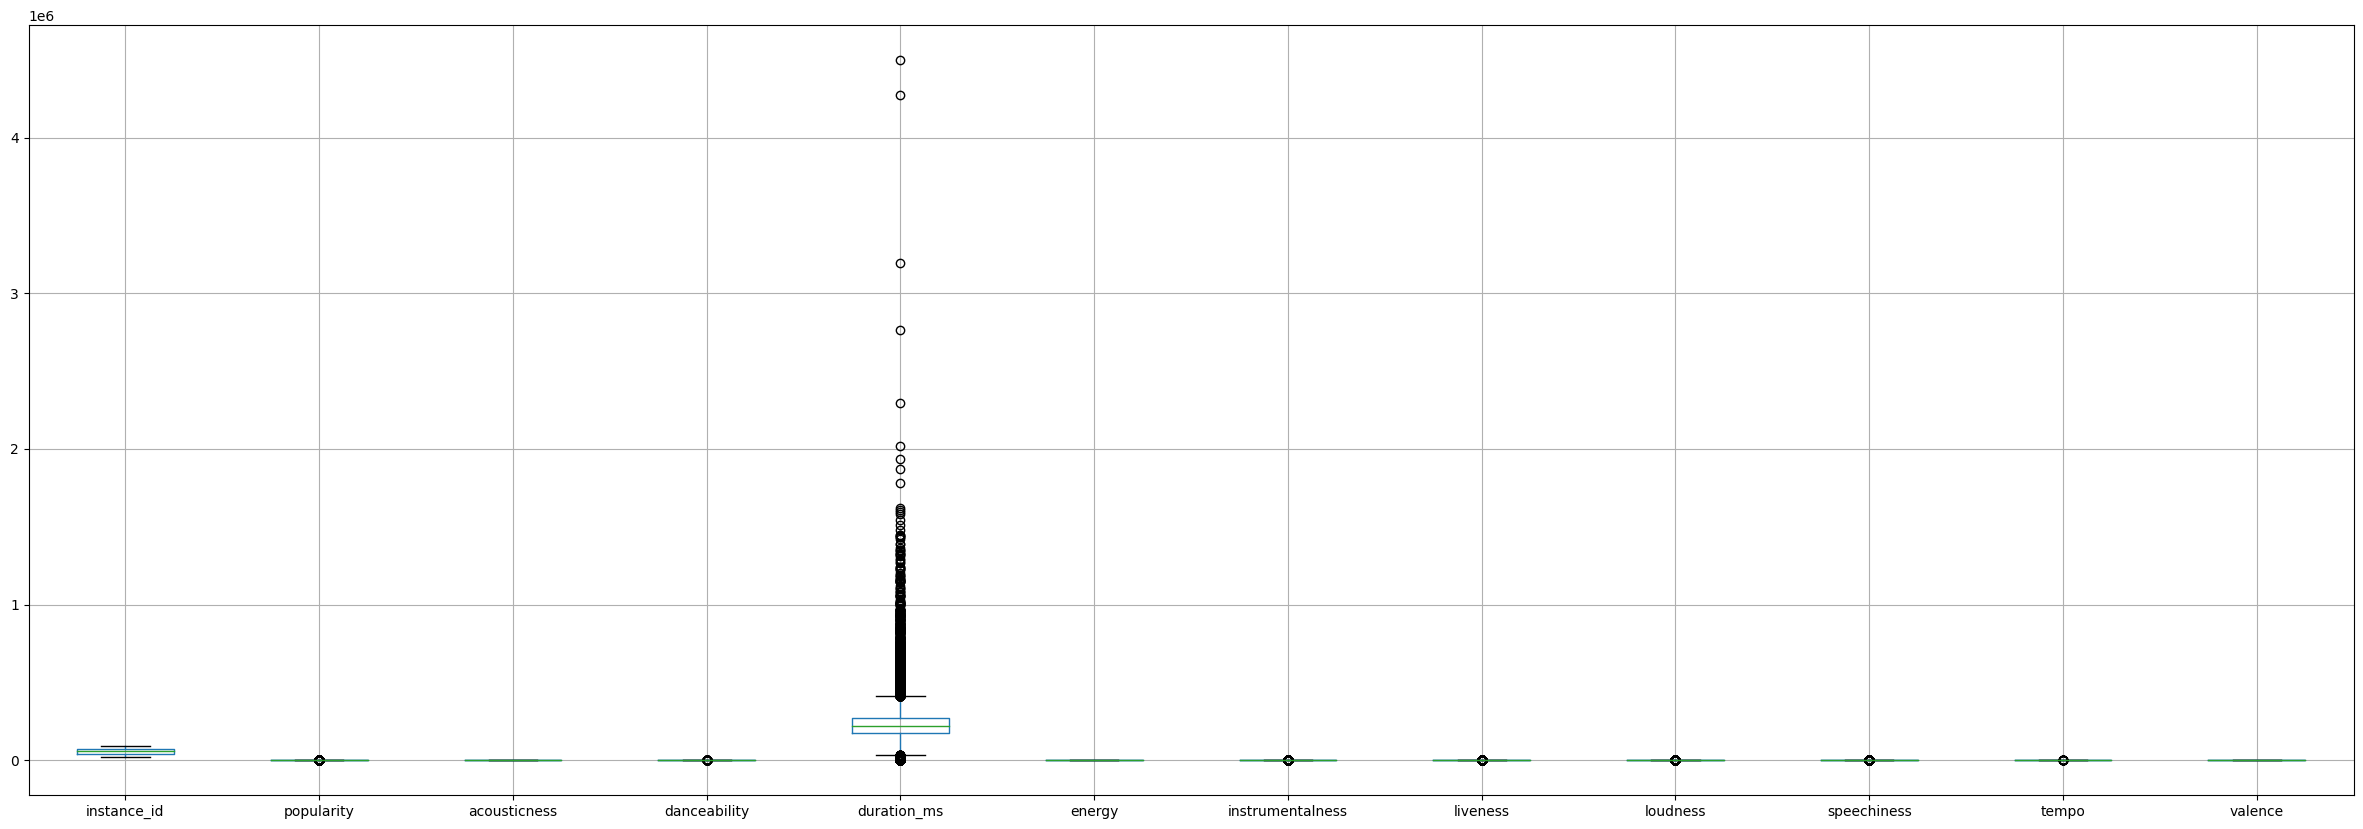

In [18]:
plt.rcParams['figure.figsize'] = 30, 10
data.select_dtypes(include=np.number).boxplot()


#### Insight: We found the most outliers in duration_ms. So handling it...

In [19]:
#converting ms to s
data["duration_ms"]=data["duration_ms"]/1000
data.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,-0.001,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,0.31,0.01270,0.622,218.293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,0.28,0.00306,0.620,215.613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,0.34,0.02540,0.774,166.875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,0.32,0.00465,0.638,222.369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


<AxesSubplot: >

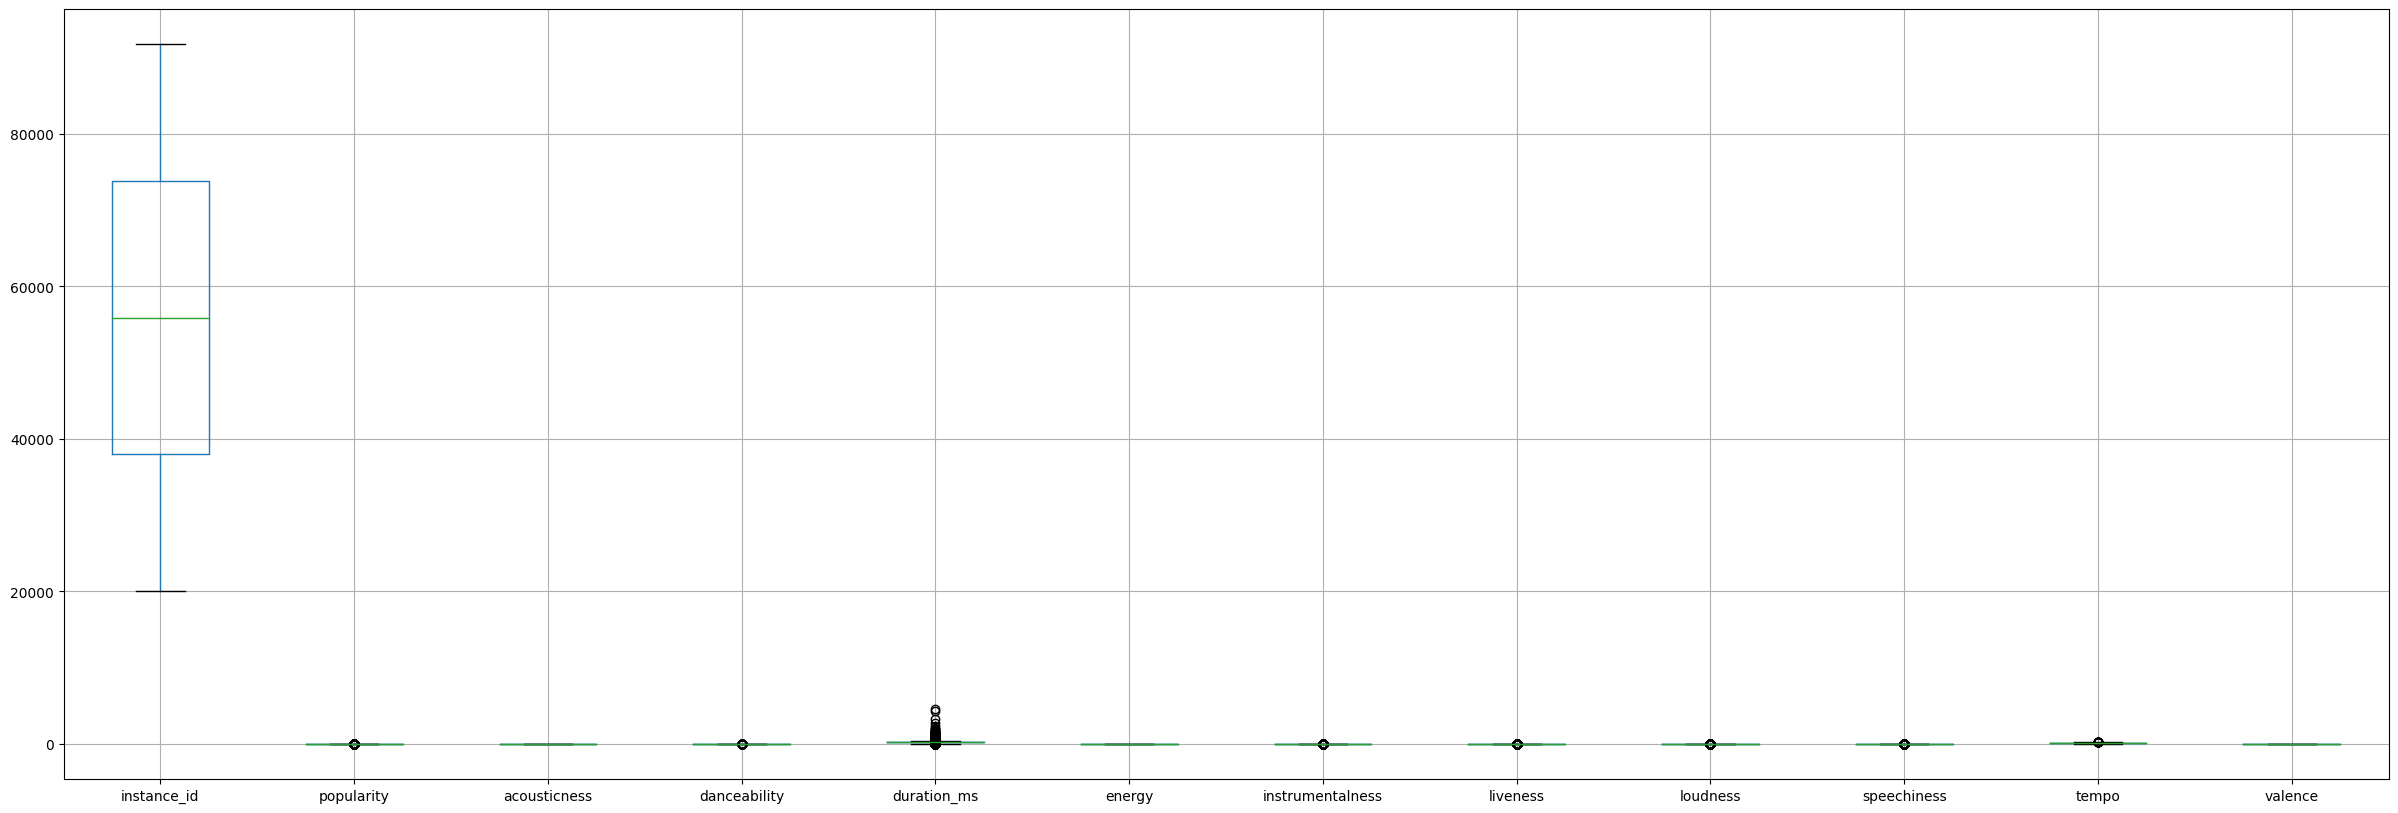

In [20]:
plt.rcParams['figure.figsize'] = 30, 10
data.select_dtypes(include=np.number).boxplot()


# Data cleaning

### Let's see if our data has missing values

In [21]:
data.isnull().any()

instance_id         True
artist_name         True
track_name          True
popularity          True
acousticness        True
danceability        True
duration_ms         True
energy              True
instrumentalness    True
key                 True
liveness            True
loudness            True
mode                True
speechiness         True
tempo               True
obtained_date       True
valence             True
music_genre         True
dtype: bool

In [22]:
# Number or data that null ??
data.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [23]:
data.dropna(how='any', inplace=True)

In [24]:
dataset_null=(data.isna().sum()/len(data))*100.0
dataset_null_ratio=dataset_null.drop(dataset_null[dataset_null==0].index).sort_values(ascending=False)
print(dataset_null_ratio)

Series([], dtype: float64)


# Hypothesis testing

Chi-square test is used as hypothesis testing for categorical attributes with target attributes i.e music_genre

In [25]:
from scipy.stats import chi2_contingency

# Define the categorical feature and the target variable
categorical_df = data.select_dtypes(include=['object'])
reqd=[]

target_variable = 'music_genre'

# Create a contingency table
for x in categorical_df:
  contingency_table = pd.crosstab(data[x], data[target_variable])

# Run the chi-square test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
  #print('Chi-square value:', chi2)
  #print(f'P-value:', p_value)
  if p_value<0.05:
    reqd.append(x)
print(reqd)

['artist_name', 'key', 'mode', 'obtained_date', 'music_genre']


In [26]:
#dropping track_name since music_genre is independent on track_name
data.drop(['track_name'],axis=1,inplace=True)
data.head()

,instance_id,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,0.27,0.00468,0.652,-0.001,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,0.31,0.01270,0.622,218.293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,0.28,0.00306,0.620,215.613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,0.34,0.02540,0.774,166.875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,0.32,0.00465,0.638,222.369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# Encoding the data and Feature extraction



In [27]:
from sklearn.preprocessing import LabelEncoder
#Create a LabelEncoder object

le = LabelEncoder()

data['key']=le.fit_transform(data['key'])
data['mode']=le.fit_transform(data['mode'])
data['obtained_date']=le.fit_transform(data['obtained_date'])
data['artist_code'] = le.fit_transform(data['artist_name'])
data['music_genre'] = le.fit_transform(data['music_genre'])

# Print the numerical labels
print(data['music_genre'].value_counts())



9    4561
7    4521
6    4520
8    4504
3    4500
1    4497
0    4495
4    4486
2    4470
5    4466
Name: music_genre, dtype: int64


### Label encoding class:
{'Alternative': 0, 'Anime': 1, 'Blues': 2, 'Classical': 3, 'Country': 4, 'Electronic': 5, 'Hip-Hop': 6, 'Jazz': 7, 'Rap': 8, 'Rock': 9}


In [28]:
# finding artist genre used
def art_genre(df):
    for row_label in df.index:
        art_genre = np.unique(df[df['artist_code'] == df.loc[row_label,'artist_code']]['music_genre'])
        #adding art_genre column in data
        df.loc[row_label,'art_genre'] = str(art_genre)
    return df
print(art_genre(data))
#encoding art_genre column
data['art_genre'] = le.fit_transform(data['art_genre'])

       instance_id           artist_name  popularity  acousticness  \
0          32894.0              Röyksopp        0.27       0.00468   
1          46652.0  Thievery Corporation        0.31       0.01270   
2          30097.0        Dillon Francis        0.28       0.00306   
3          62177.0              Dubloadz        0.34       0.02540   
4          24907.0           What So Not        0.32       0.00465   
...            ...                   ...         ...           ...   
50000      58878.0                 BEXEY        0.59       0.03340   
50001      43557.0             Roy Woods        0.72       0.15700   
50002      39767.0                Berner        0.51       0.00597   
50003      57944.0             The-Dream        0.65       0.08310   
50004      63470.0     Naughty By Nature        0.67       0.10200   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
0             0.652       -0.001   0.941           0.79200    1     0.115   
1    

In [29]:
data.head()

,instance_id,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,artist_code,art_genre
0,32894.0,Röyksopp,0.27,0.00468,0.652,-0.001,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,2,0.759,5,4833,10
1,46652.0,Thievery Corporation,0.31,0.01270,0.622,218.293,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,2,0.531,5,5880,46
2,30097.0,Dillon Francis,0.28,0.00306,0.620,215.613,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,2,0.333,5,1527,49
3,62177.0,Dubloadz,0.34,0.02540,0.774,166.875,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,2,0.270,5,1638,49
4,24907.0,What So Not,0.32,0.00465,0.638,222.369,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,2,0.323,5,6268,49


<AxesSubplot: >

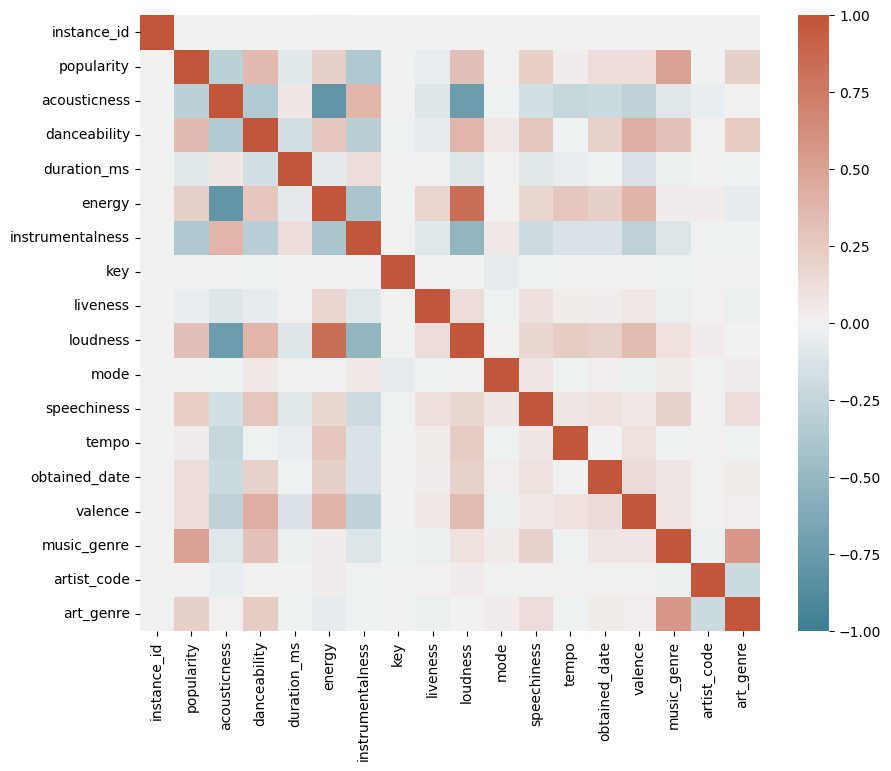

In [30]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(data.select_dtypes(include=np.number).corr(), 
             vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

Insight: art_genre is highly correlated with music_genre(our target). Loudness is highly correlated with energy

data.info()

In [31]:
import seaborn as sns

corr_matrix = data.corr()
correlations = corr_matrix['music_genre'].sort_values(ascending=False)
print(correlations)

music_genre         1.000000
art_genre           0.569878
popularity          0.502620
danceability        0.302730
speechiness         0.188814
loudness            0.102907
obtained_date       0.081197
valence             0.077881
mode                0.041013
energy              0.034433
instance_id         0.001240
key                -0.014722
tempo              -0.022762
artist_code        -0.025694
liveness           -0.026354
duration_ms        -0.029463
acousticness       -0.098186
instrumentalness   -0.110771
Name: music_genre, dtype: float64


/tmp/ipykernel_20/2586129212.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


### Taking top correlation features with music_genre only

In [32]:

data.drop(['instance_id','key','tempo','artist_code','artist_name','liveness','duration_ms','obtained_date','energy'],axis=1,inplace=True)
print(data.head())
print(data.info())

   popularity  acousticness  danceability  instrumentalness  loudness  mode  \
0        0.27       0.00468         0.652           0.79200    -5.201     1   
1        0.31       0.01270         0.622           0.95000    -7.043     1   
2        0.28       0.00306         0.620           0.01180    -4.617     0   
3        0.34       0.02540         0.774           0.00253    -4.498     0   
4        0.32       0.00465         0.638           0.90900    -6.266     0   

   speechiness  valence  music_genre  art_genre  
0       0.0748    0.759            5         10  
1       0.0300    0.531            5         46  
2       0.0345    0.333            5         49  
3       0.2390    0.270            5         49  
4       0.0413    0.323            5         49  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity       

# Model building

In [33]:
# Splitting the dataset
data.dropna(how='any', inplace=True)
from sklearn.model_selection import train_test_split
X = data.drop(columns=['music_genre'])
y = data['music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31514, 9) (13506, 9) (31514,) (13506,)


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model= XGBClassifier(n_estimators=101,random_state=42,learning_rate=0.1)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)




# Performance metrics

In [35]:
print("accuracy:",accuracy_score(y_hat, y_test))

accuracy: 0.8232637346364579


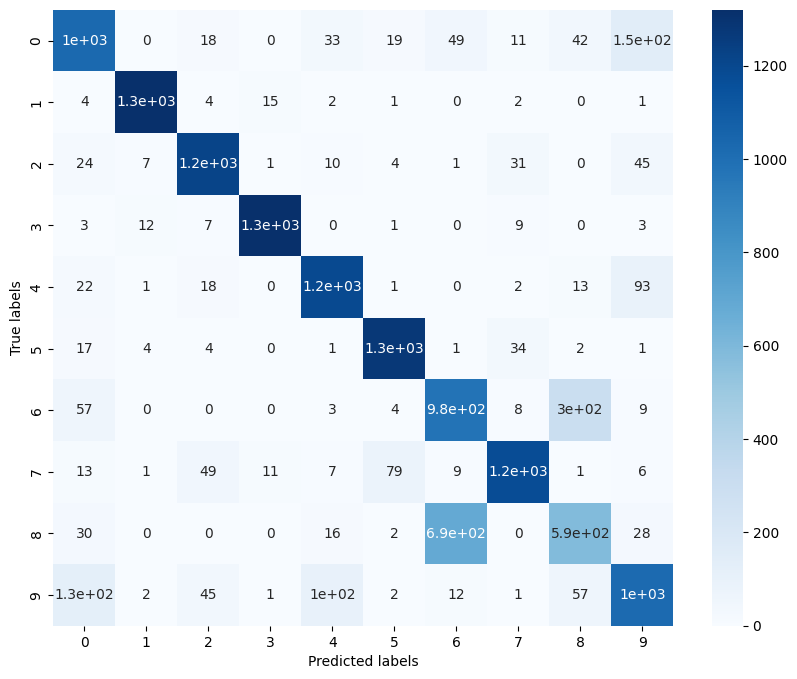

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap='Blues')

# Customize the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



In [37]:
report = classification_report(y_test, y_hat, target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'])
print(report)

              precision    recall  f1-score   support

     class 0       0.78      0.76      0.77      1349
     class 1       0.98      0.98      0.98      1349
     class 2       0.89      0.91      0.90      1341
     class 3       0.98      0.97      0.98      1350
     class 4       0.87      0.89      0.88      1346
     class 5       0.92      0.95      0.94      1340
     class 6       0.56      0.72      0.63      1356
     class 7       0.92      0.87      0.90      1356
     class 8       0.59      0.43      0.50      1351
     class 9       0.75      0.75      0.75      1368

    accuracy                           0.82     13506
   macro avg       0.82      0.82      0.82     13506
weighted avg       0.82      0.82      0.82     13506



# Feature importance

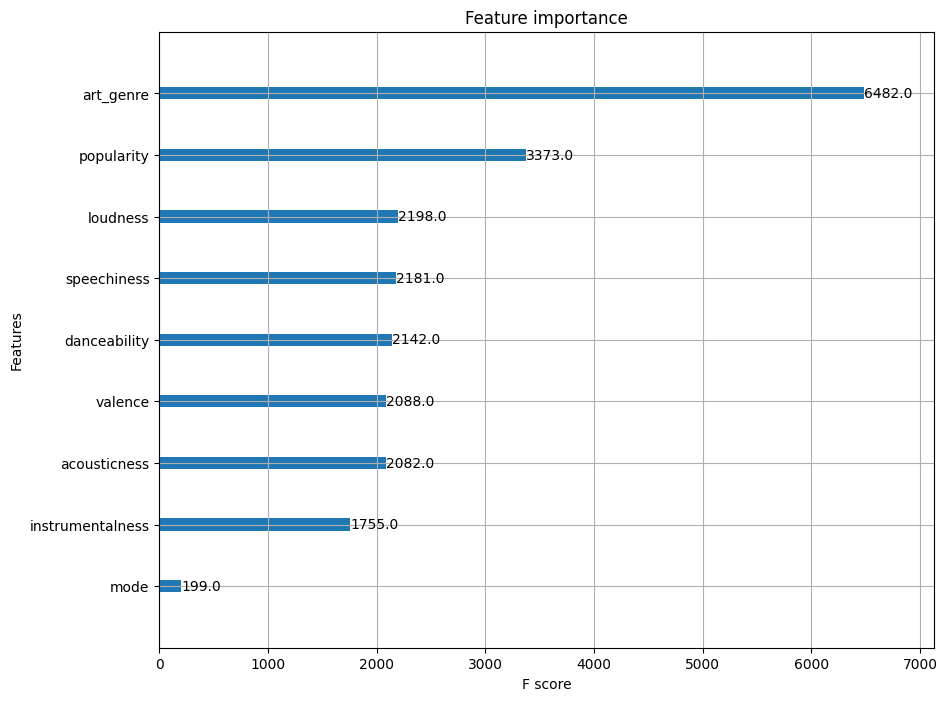

In [38]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(model)
plt.show()